# Exploration 

## 1. Analyse des variables pertinentes

## 2. Selection des variables avec moins de 50% de remplissage

## Import

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re

In [16]:
data = pd.read_csv('clean_data.csv', low_memory=False)

In [17]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,1kg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,2.46 kg,plastique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000036252,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221701,2015-01-25T21:35:01Z,1489055667,2017-03-09T10:34:27Z,Lion Peanut x2,NaN,NaN,...,2.5,2.5,0.09652,0.038,NaN,NaN,0.1,0.0009,22.0,22.0
4,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1473538082,2016-09-10T20:08:02Z,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualisation données manquantes

<Axes: >

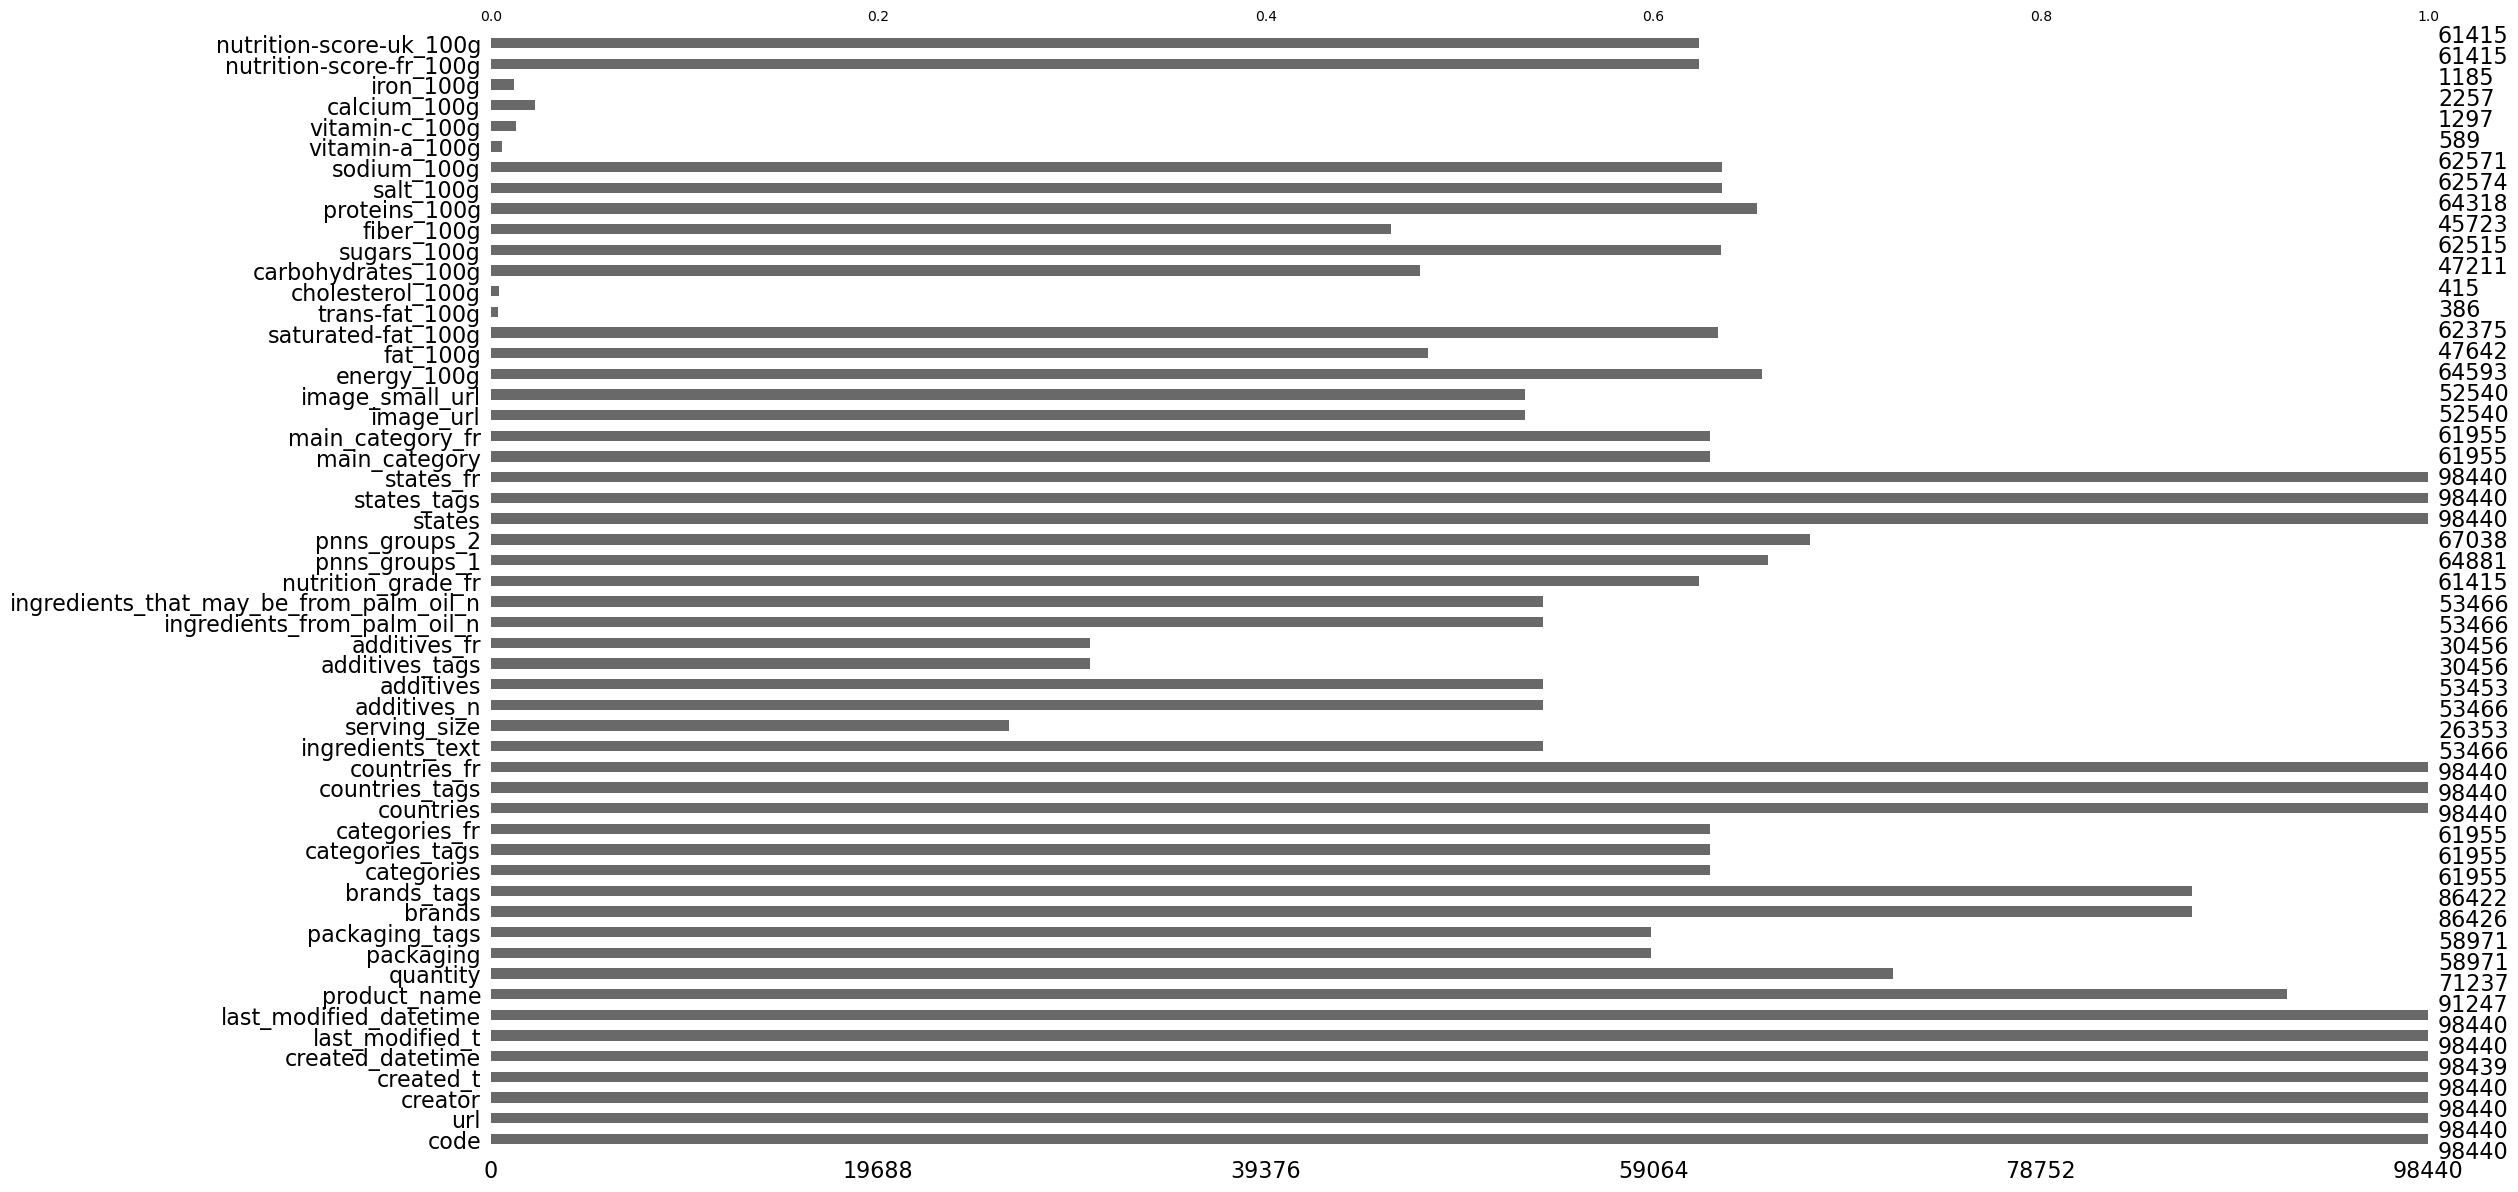

In [18]:
# Barres de visualisation des données manquantes
msno.bar(data)

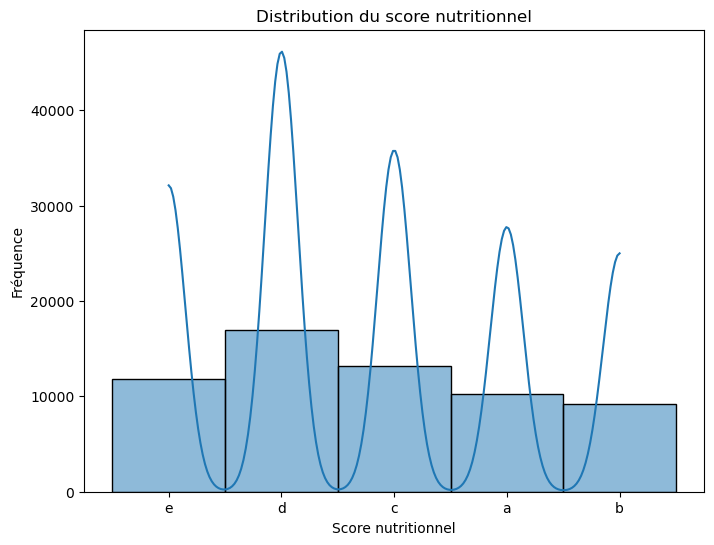

In [19]:
# Analyse univariée
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='nutrition_grade_fr', kde=True)
plt.title('Distribution du score nutritionnel')
plt.xlabel('Score nutritionnel')
plt.ylabel('Fréquence')
plt.show()

### Selection de variables avec plus de 50 % de valeurs manquantes 

In [20]:
selected_variables = ['code', 'product_name', 'quantity', 'packaging', 'brands', 'main_category_fr', 'ingredients_text', 'serving_size', 'additives_fr', 'additives_tags', 'nutrition_grade_fr']
missing_values = data[0::].isnull().mean()
missing_variables = missing_values[missing_values > 0.5].index
display(missing_variables)

Index(['serving_size', 'additives_tags', 'additives_fr', 'fat_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'fiber_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g',
       'iron_100g'],
      dtype='object')

## Variables cibles 

* serving_size
* additives_fr

## Analyse de la variable additives_fr

In [21]:
# Afficher les fréquences des valeurs de la variable 'additives_fr'
additives_fr_freq = data['additives_fr'].value_counts()

# Afficher les valeurs les plus fréquentes
top_values = additives_fr_freq.head(10)
print("Top 10 des valeurs les plus fréquentes :\n", top_values)

# Afficher les valeurs les moins fréquentes
bottom_values = additives_fr_freq.tail(10)
display("Top 10 des valeurs les moins fréquentes :\n", bottom_values)

Top 10 des valeurs les plus fréquentes :
 E322 - Lécithines                                      1714
E330 - Acide citrique                                  1175
E300 - Acide ascorbique                                1093
E440 - Pectines                                         470
E301 - Ascorbate de sodium,E250 - Nitrite de sodium     392
E250 - Nitrite de sodium                                362
E14XX - Amidons modifiés                                317
E330 - Acide citrique,E300 - Acide ascorbique           302
E160c - Extrait de paprika                              270
E440 - Pectines,E330 - Acide citrique                   262
Name: additives_fr, dtype: int64


'Top 10 des valeurs les moins fréquentes :\n'

E420 - Sorbitol,E450 - Sels métalliques de diphosphates,E451 - Triphosphates,E621 - Glutamate monosodique,E160c - Extrait de paprika,E160a - Bêta-carotène,E415 - Gomme xanthane,E412 - Gomme de guar,E202 - Sorbate de potassium                           1
E451 - Triphosphates,E202 - Sorbate de potassium                                                                                                                                                                                                            1
E407a - Algues euchema transformées,E451 - Triphosphates,E100 - Curcumine,E160 - Caroténoïdes,E161b - Lutéine,E160c - Extrait de paprika,E202 - Sorbate de potassium,E415 - Gomme xanthane,E412 - Gomme de guar                                             1
E621 - Glutamate monosodique,E471 - Mono- et diglycérides d'acides gras alimentaires,E322 - Lécithines,E415 - Gomme xanthane,E340 - Orthophosphates de potassium                                                                              

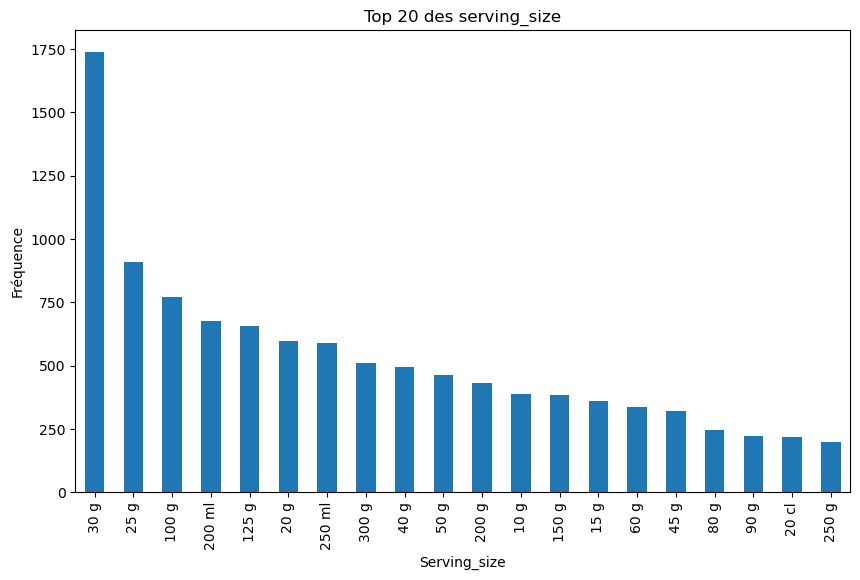

In [22]:


# Afficher les différentes valeurs uniques et leur fréquence
servings_counts = data['serving_size'].value_counts()

# Sélectionner les 10 premières valeurs d'emballage les plus fréquentes
top_10_packaging = servings_counts.head(20)

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
top_10_packaging.plot(kind='bar')
plt.title('Top 20 des serving_size')
plt.xlabel('Serving_size')
plt.ylabel('Fréquence')
plt.show()

In [23]:
serving_size = data['serving_size'].unique()
print(serving_size)

[nan '40 g (0.25 cup)' '48 g (0.25 cup)' ... '92.5 g' '17 g (1 Tbsp)'
 '25 g (bun)']


In [24]:
serving_sizes = data['serving_size'].value_counts()
print(serving_sizes)

30 g                                          1737
25 g                                           910
100 g                                          769
200 ml                                         676
125 g                                          658
                                              ... 
Une cuillère à soupe (15 g)                      1
55 mg = une cuillère à café de sucre (4 g)       1
Une cuillère à soupe 10 ml                       1
58.3 g                                           1
25 g (bun)                                       1
Name: serving_size, Length: 5699, dtype: int64


In [25]:
# Examiner la structure des données
print("Type de données : ", data['serving_size'].dtype)
print("Premières lignes : ")
print(data['serving_size'].head())

Type de données :  object
Premières lignes : 
0                NaN
1                NaN
2                NaN
3    40 g (0.25 cup)
4                NaN
Name: serving_size, dtype: object


In [26]:
# Effectuer une analyse descriptive
print("Statistiques descriptives : ")
print(data['serving_size'].describe())
print("Valeurs uniques : ")
print(data['serving_size'].unique())
print("Occurrences des valeurs : ")
print(data['serving_size'].value_counts())

Statistiques descriptives : 
count     26353
unique     5699
top        30 g
freq       1737
Name: serving_size, dtype: object
Valeurs uniques : 
[nan '40 g (0.25 cup)' '48 g (0.25 cup)' ... '92.5 g' '17 g (1 Tbsp)'
 '25 g (bun)']
Occurrences des valeurs : 
30 g                                          1737
25 g                                           910
100 g                                          769
200 ml                                         676
125 g                                          658
                                              ... 
Une cuillère à soupe (15 g)                      1
55 mg = une cuillère à café de sucre (4 g)       1
Une cuillère à soupe 10 ml                       1
58.3 g                                           1
25 g (bun)                                       1
Name: serving_size, Length: 5699, dtype: int64


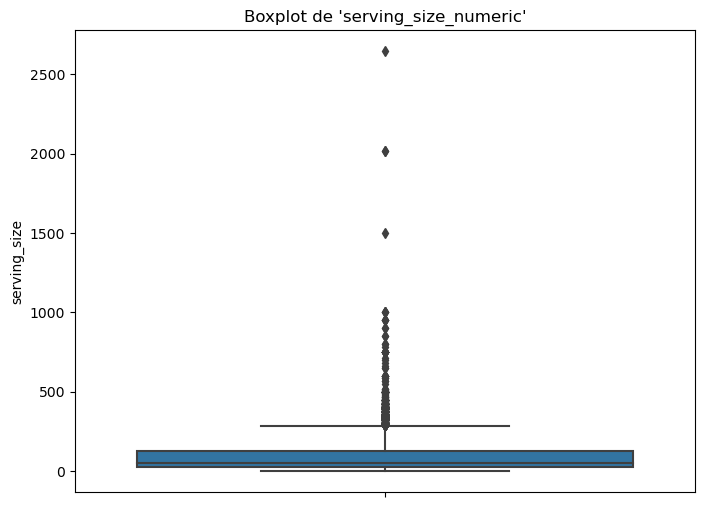

In [27]:
# Extraction de la partie numérique de la chaîne
data['serving_size_numeric'] = data['serving_size'].apply(lambda x: re.findall(r'\d+', str(x))[0] if re.findall(r'\d+', str(x)) else None)

# Conversion en type numérique
data['serving_size_numeric'] = pd.to_numeric(data['serving_size_numeric'], errors='coerce')

# Visualisation des valeurs aberrantes
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='serving_size_numeric')
plt.title("Boxplot de 'serving_size_numeric'")
plt.ylabel("serving_size")
plt.show()

# Détection des valeurs aberrantes
threshold = 3  # Définir un seuil pour identifier les valeurs aberrantes
outliers = data[data['serving_size_numeric'] > threshold * data['serving_size_numeric'].std()]